# Initially, run "Mount Google drive" once and put the "ObesityDataSet_raw_and_data_sinthetic.csv" into the newly created folder "Colab Notebooks" which is directly under the root of your Google drive

## Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
from pathlib import Path
Path("/gdrive/MyDrive/Colab Notebooks/").mkdir(parents=True, exist_ok=True)
%ls /gdrive/MyDrive/Colab\ Notebooks/

Mounted at /gdrive
/gdrive
correlation_heatmap.png                    obesity_frequent_itemsets_fpgrowth.csv
data_encoded.csv                           obesity_test.csv
distribution/                              obesity_test_y.csv
「FP-growth.ipynb」的副本                  obesity_train.csv
frequentitem_set.csv                       obesity_train_X.csv
frequent_itemsets.csv                      obesity_train_y.csv
frequent_itemsets_updated_file.csv         outlier/
low_variance_features.png                  outlier_flagging.png
mlxtend_ECLAT.ipynb                        processed_train_X.csv
obesity_association_rules_eclat.csv        processed_train_y.csv
obesity_association_rules_eclat.gsheet     pyECLAT.ipynb
obesity_association_rules_fpgrowth.csv     summary/
obesity_association_rules_fpgrowth.gsheet  supports.csv
ObesityDataSet_raw_and_data_sinthetic.csv  target_balance.png
obesity_frequent_itemsets_eclat.csv        「Term_Project_Preprocessing.ipynb」的副本
obesity_frequent_itemsets_eclat.g

## Load the original file

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/ObesityDataSet_raw_and_data_sinthetic.csv')
dataset['FCVC'] = np.floor(dataset['FCVC']).astype('Int64')
dataset['NCP'] = np.floor(dataset['NCP']).astype('Int64')
dataset['CH2O'] = np.floor(dataset['CH2O']).astype('Int64')
dataset['FAF'] = np.floor(dataset['FAF']).astype('Int64')
dataset['TUE'] = np.floor(dataset['TUE']).astype('Int64')
dataset['Age'] = np.floor(dataset['Age']).astype('Int64')
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


## Show the number of columns and records

In [ ]:
dataset.shape

(2111, 17)

## Split training and testing datasets with ratio of 80/20

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(dataset,shuffle=True, test_size=0.2, random_state=42) # 80% training and 20% testing
test_data.head()
# Save the training and testing sets to new CSV files
train_data.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train.csv', index=False)
test_data.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test.csv', index=False)

## Setup training data

In [ ]:
# Load the training dataset
train_data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train.csv')

# Separate features (X) and target variable (y)
obesity_train_X = train_data.drop('NObeyesdad', axis=1)
obesity_train_y = train_data['NObeyesdad']

# Save the features and target variable to new CSV files
obesity_train_X.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train_X.csv', index=False)
obesity_train_y.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train_y.csv', index=False)

## Handle testing data

In [ ]:
# Load the test dataset
test_data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test.csv')

# Drop NObeyesdad feature

obesity_test_X = test_data.drop('NObeyesdad', axis=1)
obesity_test_y = test_data['NObeyesdad']
# Save the features and target variable to new CSV files
obesity_test_X.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test_X.csv', index=False)
obesity_test_y.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test_y.csv', index=False)

## Check up missing values

In [ ]:
# Load the features and target variable for the training dataset
obesity_train_X = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train_X.csv')

# Check the missing values for train_X
train_X_missing_values = obesity_train_X.isnull().sum()
# Filter to only columns with missing values and print those
columns_with_missing = train_X_missing_values[train_X_missing_values > 0]
# Iterate over the columns with missing values
for col, missing_count in columns_with_missing.items():
    print(col, missing_count)
print("Columns with missing values:", len(columns_with_missing))
print("Columns without missing values:", len(train_X_missing_values) - len(columns_with_missing))

Columns with missing values: 0
Columns without missing values: 16


In [ ]:
obesity_train_y = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train_y.csv')
# Check the missing values for train_y
train_y_missing_values = obesity_train_y.isnull().sum()
print(train_y_missing_values)

NObeyesdad    0
dtype: int64


## Identify categorical columns

In [ ]:
# Identify categorical columns
categorical_columns = obesity_train_X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


## Identitfy initial essential columns based on domain knowledge and context

1.   Age - Obesity risk factors vary across age groups.
2.   Gender - Biological differences may influence obesity levels.
3.   family_history_with_overweight - Genetic predisposition to obesity is a relevant factor.
4.   FAVC (Frequent consumption of high-caloric food) - Diet choices impact obesity risk.
5.   FCVC (Frequency of vegetable consumption) - Healthy eating habits are inversely related to obesity.
6.   NCP (Number of main meals per day) - Eating frequency affects weight and metabolic health.
7.   CAEC (Consumption of food between meals) - Snacking habits may contribute to weight gain.
8.   CH2O (Water consumption) - Proper hydration can aid in weight management.
9.   FAF (Physical activity frequency) - Physical activity is crucial in maintaining a healthy weight.
10.  TUE (Time spent on technology) - Sedentary lifestyle choices are associated with obesity.
11.  CALC (Alcohol consumption frequency) - Alcoholic beverages can add significant calories to the diet.







In [ ]:
# Initial essential columns based domain knowledge and context
initial_essential_columns = [
    'Age', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
    'CAEC', 'CH2O', 'FAF', 'TUE',
    'CALC'
]
print("Manual select:", initial_essential_columns)
print("Total:", len(initial_essential_columns))

Manual select: ['Age', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC']
Total: 11


## Low-variance features detection

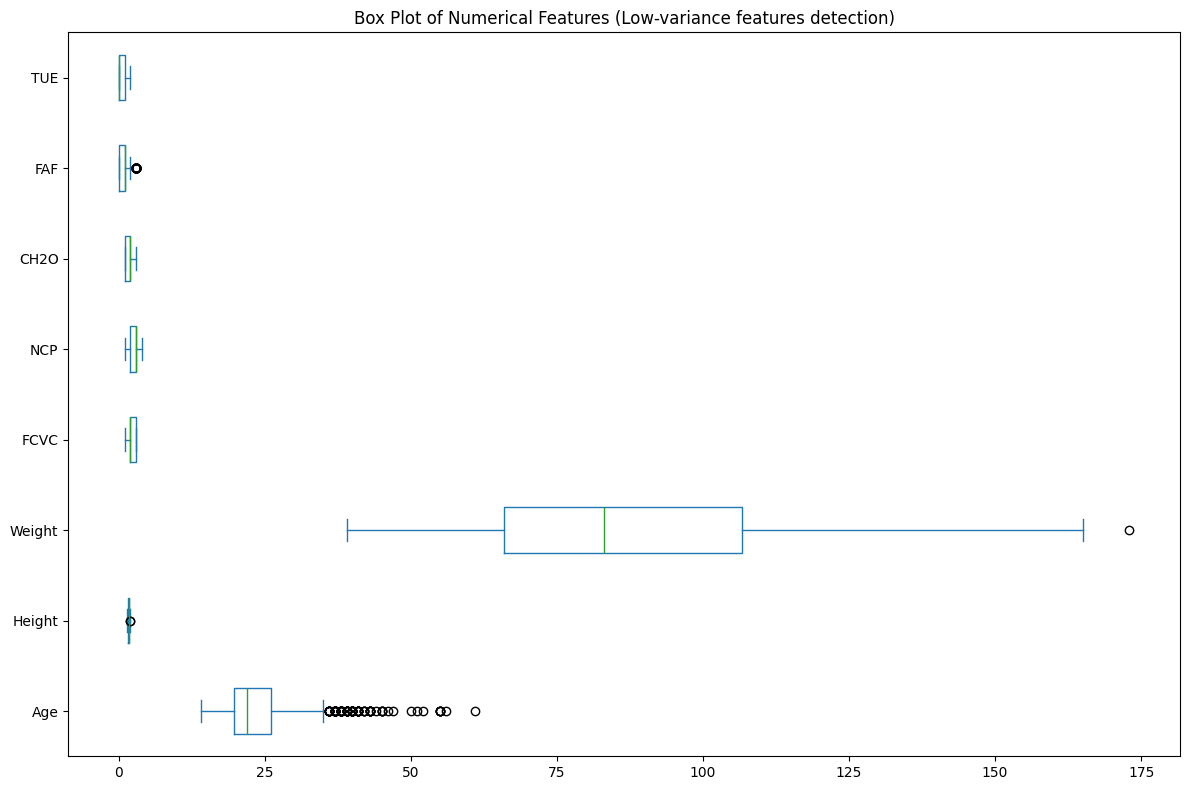

Essential Columns After Variance Analysis: Index(['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Total: 7


In [ ]:
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
# Variance Analysis (Removing low variance columns)
def remove_low_variance_features(df, threshold=0.01):
    numerical_data = df.select_dtypes(include=['float64', 'int64']).dropna()

    # Plotting box plots for each numerical column
    numerical_data_for_drawing = numerical_data.loc[:, ~numerical_data.columns.str.endswith('_id')]
    numerical_data_for_drawing.plot(kind='box', figsize=(12, 8), vert=False)
    plt.title("Box Plot of Numerical Features (Low-variance features detection)")
    plt.tight_layout()
    plt.savefig("/gdrive/MyDrive/Colab Notebooks/low_variance_features.png")
    plt.show()

    var_thresh = VarianceThreshold(threshold=threshold)
    var_thresh.fit(numerical_data)
    essential_columns = numerical_data.columns[var_thresh.get_support()]

    return essential_columns

essential_columns_variance = remove_low_variance_features(obesity_train_X)
print("Essential Columns After Variance Analysis:", essential_columns_variance)
print("Total:", len(essential_columns_variance))

## Redundant columns detection

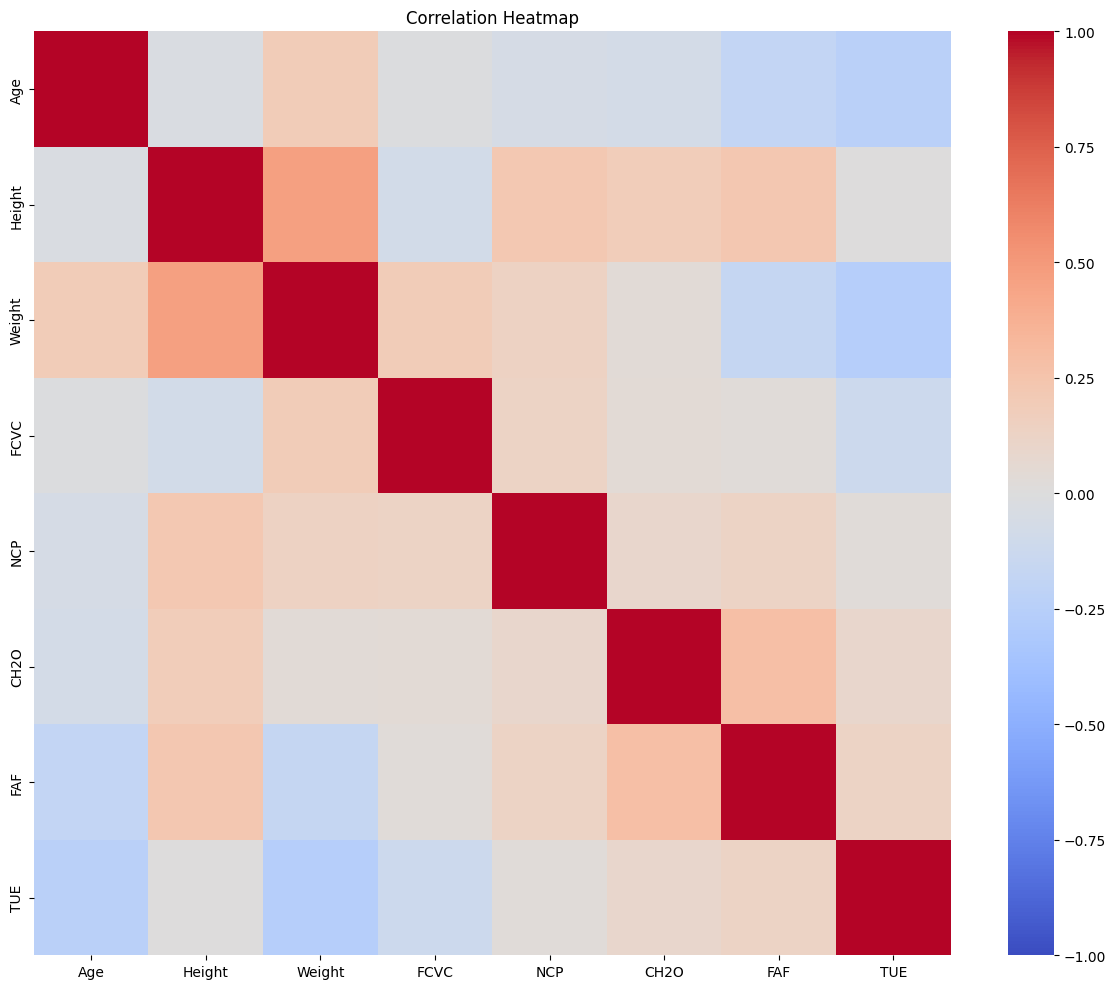

Redundant Columns Due to High Correlation: []
Total: 0
Essential Columns After Correlation Analysis: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')
Total: 16


In [ ]:
import numpy as np
import seaborn as sns
# Correlation and Redundancy Check
def find_redundant_columns(df, threshold=0.9):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Plotting correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.savefig("/gdrive/MyDrive/Colab Notebooks/correlation_heatmap.png")
    plt.show()

    # Calculate the correlation matrix
    # Taking the absolute values, as we are interested in the strength of the correlation
    corr_matrix = numeric_df.corr().abs()
    # Create the upper triangle mask of the correlation matrix
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    # Identify columns with high correlation
    redundant_columns = [
        column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)
    ]
    essential_columns = df.columns.difference(redundant_columns)
    return redundant_columns, essential_columns

redundant_columns, essential_columns_correlation = find_redundant_columns(obesity_train_X)
print("Redundant Columns Due to High Correlation:", redundant_columns)
print("Total:", len(redundant_columns))
print("Essential Columns After Correlation Analysis:", essential_columns_correlation)
print("Total:", len(essential_columns_correlation))

## Identify the essential columns based on the analysis

In [ ]:
# Identify the essential columns based on the analysis
essential_columns = list(set(essential_columns_variance)
                          & set(essential_columns_correlation))
print("Essential Columns based on analysis:", essential_columns)
print("Total:", len(essential_columns))

Essential Columns based on analysis: ['TUE', 'NCP', 'Age', 'Weight', 'FAF', 'FCVC', 'CH2O']
Total: 7


## Compare essential columns based on analysis and domain knowledge

In [ ]:
# Convert to sets for comparison
analysis_set = set(essential_columns)
domain_set = set(initial_essential_columns)
# Comparison between the three-check analysis and domain knowledge
common_columns = analysis_set.intersection(domain_set)
unique_to_analysis = analysis_set.difference(domain_set)
unique_to_domain = domain_set.difference(analysis_set)
print("Common Columns:", common_columns, len(common_columns))
print("Unique to Analysis:", unique_to_analysis, len(unique_to_analysis))
print("Unique to Domain:", unique_to_domain, len(unique_to_domain))

Common Columns: {'TUE', 'NCP', 'Age', 'FAF', 'FCVC', 'CH2O'} 6
Unique to Analysis: {'Weight'} 1
Unique to Domain: {'CALC', 'Gender', 'family_history_with_overweight', 'CAEC', 'FAVC'} 5


In [ ]:
# Get columns in the original DataFrame that match the potential essential columns
potential_essential_columns_in_order = [col for col in obesity_train_X.columns if col in potential_essential_columns]

print("Potential Essential Columns in Original Order:", potential_essential_columns_in_order, len(potential_essential_columns_in_order))

# Filter the DataFrame based on the ordered essential columns
train_X_essential = obesity_train_X.loc[:, potential_essential_columns_in_order]

print("Shape of train_X_essential:", train_X_essential.shape)

# potential_essential_columns = list(common_columns | unique_to_domain)
# print("Potential Essential Columns:", potential_essential_columns, len(potential_essential_columns))

# # Filter columns based on essential columns
# train_X_essential = obesity_train_X.loc[:, potential_essential_columns]
# print(train_X_essential.shape)

NameError: name 'potential_essential_columns' is not defined

In [ ]:
# Separate numerical and categorical columns
numerical_cols = train_X_essential.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_X_essential.select_dtypes(include=['object']).columns

## Get Skewness value of each column

In [ ]:
# Use Skewness to measure asymmetry in a data distribution
skewness = train_X_essential[numerical_cols].skew()
print("Skewness of each numerical column:")
print(skewness)

In [ ]:
Path("/gdrive/MyDrive/Colab Notebooks/distribution/").mkdir(parents=True, exist_ok=True)
Path("/gdrive/MyDrive/Colab Notebooks/distribution/symmetric/").mkdir(parents=True, exist_ok=True)
Path("/gdrive/MyDrive/Colab Notebooks/distribution/right-skew/").mkdir(parents=True, exist_ok=True)
Path("/gdrive/MyDrive/Colab Notebooks/distribution/left-skew/").mkdir(parents=True, exist_ok=True)
for col in numerical_cols:
    # Plotting histogram before imputation
    plt.figure(figsize=(6, 4))
    train_X_essential[col].dropna().hist(bins=30, alpha=0.7)
    plt.title(f"Distribution of {col} (Skewness {round(skewness[col],1):.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    if abs(skewness[col]) < 0.5:
        plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/distribution/symmetric/{col}_distribution.png")
    else:
        if skewness[col] > 0.5:
            plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/distribution/right-skew/{col}_distribution.png")
        elif skewness[col] < -0.5:
            plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/distribution/left-skew/{col}_distribution.png")
    plt.show()
    plt.close()

## Apply encoding based on non-ordinal or ordinal categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Define criteria to classify columns as non-ordinal
def is_non_ordinal(col):
    unique_values = train_X_essential[col].nunique()
    keywords = ['type', 'category', 'id', 'region', 'name']

    # Condition 1: High cardinality (many unique values)
    if unique_values > 10:
        return True

    # Condition 2: Non-numeric categories (purely text-based categories)
    if not pd.to_numeric(train_X_essential[col], errors='coerce').notna().all():
        return True

    # Condition 3: Column name has common non-ordinal keywords
    if any(keyword.lower() in col.lower() for keyword in keywords):
        return True

    return False
print("Before encode DataFrame:")
print(train_X_essential.shape)
# Apply encoding based on non-ordinal or ordinal classification
for col in categorical_cols:
    # Apply LabelEncoder
    label_encoder = LabelEncoder()
    train_X_essential[col] = label_encoder.fit_transform(train_X_essential[col])
    # if is_non_ordinal(col):
    #     # Apply one-hot encoding for non-ordinal columns
    #     train_X_essential = pd.get_dummies(train_X_essential, columns=[col], drop_first=True)
    # else:
    #     # Apply label encoding for ordinal columns
    #     label_encoder = LabelEncoder()
    #     train_X_essential[col] = label_encoder.fit_transform(train_X_essential[col])

# Final check to see the transformed DataFrame
print("Encoded DataFrame:")
print(train_X_essential.head())
# Display the shape of the dataset
print(train_X_essential.shape)

## Target blance analysis
### The data is well-balanced—no need to do any further imbalanced handle.




In [ ]:
# Check the balance of the target variable 'has_died' in train_y
target_balance = obesity_train_y['NObeyesdad'].value_counts(normalize=True)
# Display the target balance
print("Target Balance:", target_balance)

# Plot original class distribution
plt.figure(figsize=(6, 4))
target_balance.plot(kind='bar')
plt.title("Original Class Distribution")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/target_balance.png")
plt.show()

## Visual analysis for outlier detection
### Add outlier flags

In [ ]:
Path("/gdrive/MyDrive/Colab Notebooks/outlier/").mkdir(parents=True, exist_ok=True)
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    train_X_essential[col].plot(kind='box')
    plt.title(f"Box Plot for {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/outlier/{col}_box_plot.png")
    plt.show()
    plt.close()  # Close the figure after displaying it to free memory

In [ ]:
# Calculate IQR for detecting outliers
Q1 = train_X_essential[numerical_cols].quantile(0.25)
Q3 = train_X_essential[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
# Flagging outliers without removing them
train_X_essential['outlier_flag'] = ((train_X_essential[numerical_cols] < (Q1 - 1.5 * IQR)) | (
            train_X_essential[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1).astype(int)

# Plotting the count of flagged and non-flagged rows
plt.figure(figsize=(6, 4))
sns.countplot(x='outlier_flag', data=train_X_essential)
plt.title("Count of Flagged Outliers")
plt.xlabel("Outlier Flag (1 = Outlier, 0 = Non-Outlier)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Colab Notebooks/outlier_flagging.png")

## Statistics after data preprocessing

In [ ]:
# Generate Summary Statistics
numerical_columns = train_X_essential.select_dtypes(include=['float64', 'int64']).columns
# Summary statistics for numerical columns
print("Summary Statistics:")
print(train_X_essential[numerical_columns].describe())
# Display the shape of the dataset
print(train_X_essential.shape)
print(obesity_train_y.shape)

In [ ]:
Path("/gdrive/MyDrive/Colab Notebooks/summary/").mkdir(parents=True, exist_ok=True)
Path("/gdrive/MyDrive/Colab Notebooks/summary/histograms/").mkdir(parents=True, exist_ok=True)
# 1. Histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_X_essential[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/summary/histograms/{col}_histogram.png")
    plt.show()
    plt.close()
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_X_essential[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Colab Notebooks/summary/correlation_heatmap.png")
plt.show()

## Save processed files

In [ ]:
# Save the processed dataset to a CSV file
train_X_essential.to_csv("/gdrive/MyDrive/Colab Notebooks/processed_train_X.csv", index=False)
obesity_train_y.to_csv("/gdrive/MyDrive/Colab Notebooks/processed_train_y.csv", index=False)
print("The processed dataset has saved.")

NameError: name 'train_X_essential' is not defined